# PROJECT : Fake News Detection

**Data load from Drive**

In [1]:
# prompt: drive mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Fake news/train.csv.zip'

Archive:  /content/drive/MyDrive/Fake news/train.csv.zip
  inflating: train.csv               


**Import required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
df=pd.read_csv('/content/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [10]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [11]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [12]:
df.describe(include=['O'])


,title,author,text
count,20242,18843,20761
unique,19803,4201,20386
top,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,5,243,75


**Checking missing values**

In [13]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

**Find Value count and Data Visualization**

In [14]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

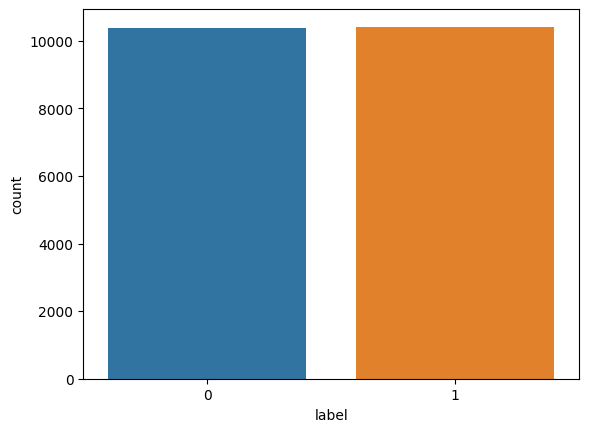

In [15]:
sns.countplot(x='label',data=df)

In [16]:
df['author'].value_counts()

Pam Key                                      243
admin                                        193
Jerome Hudson                                166
Charlie Spiering                             141
John Hayward                                 140
                                            ... 
Jeremy R. Hammond                              1
Vic Bishop                                     1
Douglas Martin                                 1
Najim Rahim and Fahim Abed                     1
Michael J. de la Merced and Rachel Abrams      1
Name: author, Length: 4201, dtype: int64

<Axes: >

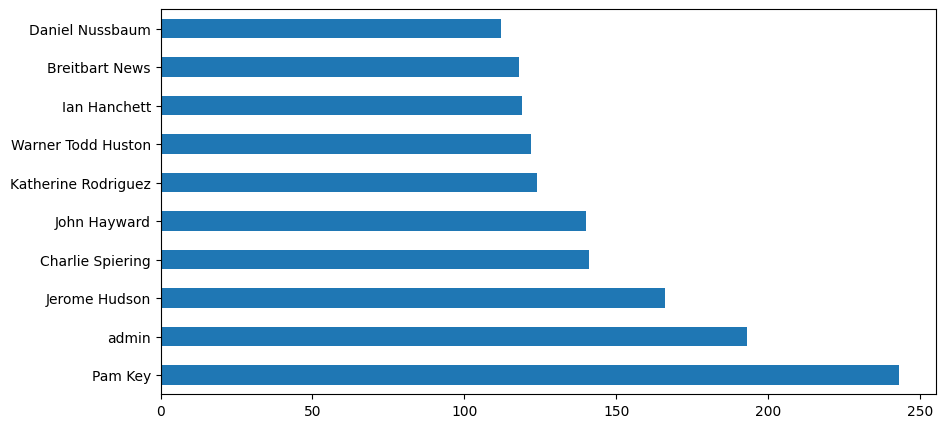

In [17]:
plt.figure(figsize=(10,5))
df['author'].value_counts().head(10).plot(kind='barh')

**Replacing the null values with empty string**

In [18]:
df=df.fillna('')

**Merging the Author name and News title**

In [19]:
df['content']=df['author']+' '+df['title']
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [20]:
!pip install nltk
!pip install wordnet
!pip install omw-1.4

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10500 sha256=9d1069a51cfe919add0091301e6c4657765a7732ad7743ca6958be5a25272b77
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet
ERROR: Could not find a version that satisfies the requirement omw-1.4 (from versions: none)
ERROR: No matching distribution found for omw-1.4


**Data preprocessing**

In [21]:
def stemming(content):
    text=re.sub('[^A-Za-z0-9]',' ',content)
    text=text.lower()
    text=text.split()
    ps=PorterStemmer()
    text=[ps.stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    return text

In [22]:
df['content']=df['content'].apply(stemming)

In [23]:
df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                         david swanson keep f 35 aliv
Name: content, Length: 20800, dtype: object

In [24]:
x=df['content'].values
x

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f 35 aliv'], dtype=object)

**Vectorization**

In [25]:
vectorizer=TfidfVectorizer()
vectorizer.fit(x)
train_data=vectorizer.transform(x)
print(train_data)

  (0, 16187)	0.28485063562728646
  (0, 13976)	0.2565896679337957
  (0, 9396)	0.3635963806326075
  (0, 9117)	0.29212514087043684
  (0, 8179)	0.24785219520671603
  (0, 7491)	0.21874169089359144
  (0, 5455)	0.23331696690935097
  (0, 4272)	0.2705332480845492
  (0, 4080)	0.3598939188262559
  (0, 3437)	0.2468450128533713
  (0, 2960)	0.3676519686797209
  (0, 739)	0.2701012497770876
  (1, 17303)	0.30071745655510157
  (1, 7302)	0.19046601982968486
  (1, 5986)	0.7143299355715573
  (1, 4048)	0.26373768806048464
  (1, 3290)	0.19094574062359204
  (1, 2699)	0.3827320386859759
  (1, 2368)	0.15521974226349364
  (1, 1972)	0.2939891562094648
  (2, 16112)	0.41544962664721613
  (2, 10115)	0.49351492943649944
  (2, 6452)	0.3474613386728292
  (2, 5872)	0.3866530551182615
  (2, 3582)	0.46097489583229645
  :	:
  (20797, 12846)	0.27263457663336677
  (20797, 12641)	0.24778257724396507
  (20797, 10803)	0.08038079000566466
  (20797, 10083)	0.174553480255222
  (20797, 10011)	0.29542040034203126
  (20797, 9479)	0.3

In [26]:
train_data.shape

(20800, 17636)

In [27]:
x1=train_data
x1

<20800x17636 sparse matrix of type '<class 'numpy.float64'>'
	with 213320 stored elements in Compressed Sparse Row format>

In [28]:
y=df['label'].values
y

array([1, 0, 1, ..., 0, 1, 1])

**Split the data into Training & Testing data**

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)

In [30]:
import warnings
warnings.filterwarnings('ignore')

**Model Creation**
- LogisticRegression
- KNeighborsClassifier
- Naive_bayes
- SVM

## LogisticRegression

**Hyperparameter tuning**

In [31]:
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
param={'C':[0.001,0.01,0.1,1,10,100]}
gs=GridSearchCV(lg,param,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'C': 100}


**Model creation**

In [32]:
lg1=LogisticRegression(C=100)
lg1.fit(x_train,y_train)
y_pred=lg1.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

**Performance Evaluation**

In [33]:
a1=accuracy_score(y_test,y_pred)
print('accuracy_score :',a1)

accuracy_score : 0.9886217948717949


In [34]:
x_new=x_test[3]
prediction=lg1.predict(x_new)
print(prediction)
if(prediction[0]==0):
  print('The News is Real')
else:
  print('The News is Fake')

[0]
The News is Real


## KNeighborsClassifier

**Hyperparameter tuning**

In [35]:
knn=KNeighborsClassifier()
param1={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
gs1=GridSearchCV(knn,param1,cv=5,scoring='accuracy')
gs1.fit(x_train,y_train)
print(gs1.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


**Model creation**

In [38]:
knn1=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn1.fit(x_train,y_train)
y_pred1=knn1.predict(x_test)
y_pred1

array([1, 1, 0, ..., 0, 1, 1])

**Performance Evaluation**

In [39]:
a2=accuracy_score(y_test,y_pred1)
print('accuracy_score :',a2)
print('classification report :',classification_report(y_test,y_pred1))

accuracy_score : 0.5283653846153846
classification report :               precision    recall  f1-score   support

           0       1.00      0.07      0.12      3148
           1       0.51      1.00      0.68      3092

    accuracy                           0.53      6240
   macro avg       0.75      0.53      0.40      6240
weighted avg       0.76      0.53      0.40      6240



## Naivebayes

**Hyperparameter tuning**

In [40]:
naive=BernoulliNB()
param2={'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4]}
gs2=GridSearchCV(naive,param2,scoring='accuracy',cv=5)
gs2.fit(x_train,y_train)
print(gs2.best_params_)

{'alpha': 0.5}


**Model creation**

In [41]:
naive1=BernoulliNB(alpha=0.5)
naive1.fit(x_train,y_train)
y_pred2=naive1.predict(x_test)
y_pred2

array([1, 1, 0, ..., 0, 0, 1])

**Performance Evaluation**

In [42]:
a3=accuracy_score(y_test,y_pred2)
print('accuracy_score :',a3)
print('classification report :',classification_report(y_test,y_pred2))

accuracy_score : 0.9802884615384615
classification report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3148
           1       0.98      0.98      0.98      3092

    accuracy                           0.98      6240
   macro avg       0.98      0.98      0.98      6240
weighted avg       0.98      0.98      0.98      6240



## SVM

**Hyperparameter tuning**

In [ ]:
svc=SVC()
param3={'C':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid']}
gs3=GridSearchCV(svc,param3,cv=5,scoring='accuracy')
gs3.fit(x_train,y_train)
print(gs3.best_params_)

**Model creation**

In [43]:
svc1=SVC()
svc1.fit(x_train,y_train)
y_pred3=svc1.predict(x_test)
y_pred3

array([1, 1, 0, ..., 0, 0, 1])

**Performance Evaluation**

In [45]:
a4=accuracy_score(y_test,y_pred3)
print('accuracy_score :',a4)
print('classification report :',classification_report(y_test,y_pred3))

accuracy_score : 0.9844551282051283
classification report :               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3148
           1       0.98      0.99      0.98      3092

    accuracy                           0.98      6240
   macro avg       0.98      0.98      0.98      6240
weighted avg       0.98      0.98      0.98      6240



**Visualize model comparison**

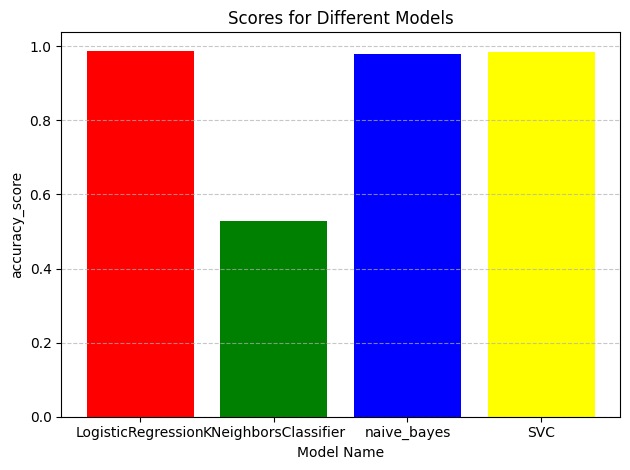

In [46]:
visual=['LogisticRegression','KNeighborsClassifier','naive_bayes','SVC']
result=[a1,a2,a3,a4]
plt.bar(visual,result,color=['red','green','blue','yellow'])
plt.xlabel('Model Name')
plt.ylabel('accuracy_score')
plt.title('Scores for Different Models')
plt.tight_layout() #ensure labels are not cut off
plt.grid(axis='y',linestyle='--',alpha=0.7)